An equities analyst is studying the pharmaceutical industry and would like your help in exploring and understanding her firm's financial data. Her main objective is to understand the structure of the pharmaceutical industry using some basic financial measures. Financial data gathered on 21 firms in the pharmaceutical industry are available in the attached file _Pharmaceuticals.csv. For each firm, the following variables are recorded:

1. Market capitalization (in billions of dollars)
2. Beta
3. Price/earnings ratio
4. Return on equity
5. Return on assets
6. Asset turnover
7. Leverage
8. Estimated revenue growth
9. Net profit margin
10. Median recommendation (across major brokerages)
11. Location of firm's headquarters
12. Stock exchange on which the firm is listed

Use cluster analysis to explore and analyze the given dataset as follows:

1. Load the Pharmaceuticals.csv data set, make Symbol the index, drop non-numerical variables, and normalize your data. Print the head of your dataframe.
2. Run the average linkage algorithm on your dataframe, generate a related dendrogram (color_threshold=3.9), and print your cluster membership (4 clusters).
3. Print a clustermap by setting labels as cluster membership and company name.
4. Run k-means clustering algorithm (use the elbow chart to determine the best number of clusters) and determine and plot the centroids. Also, print the cluster membership, the within-cluster sum of squared distances( including the cluster count), and Euclidian distance between cluster centroids.
5. To check the clusters' stability, remove a random 5% of the data (by taking a random sample of 95% of the records), and repeat the analysis. Does the same picture emerge?  Briefly discuss the results from your clustering analysis. What can you conclude?



In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates 


In [ ]:
# 1. Load the data
pharma_df = pd.read_csv('Pharmaceuticals.csv')
pharma_df.set_index('Symbol', inplace=True)
perfValues = ['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']
pharma_df.head(10)

,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
Symbol,,,,,,,,,,,,,
ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [70.0, 70.0, 106.25, 106.25],
  [55.0, 55.0, 88.125, 88.125],
  [45.0, 45.0, 71.5625, 71.5625],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [152.5, 152.5, 183.75, 183.75],
  [135.0, 135.0, 168.125, 168.125],
  [58.28125, 58.28125, 151.5625, 151.5625],
  [20.0, 20.0, 104.921875, 104.921875]],
 'dcoord': [[0.0, 26.548984914681764, 26.548984914681764, 0.0],
  [0.0, 35.88244974914617, 35.88244974914617, 0.0],
  [26.548984914681764,
   64.47611592320897,
   64.47611592320897,
   35.88244974914617],
  [0.0, 23.69868772738271, 23.69868772738271, 0.0],
  [0.0, 9.185537545511423, 9.185537545511423, 0.0],
  [0.0, 12.568033100473574, 12.5680

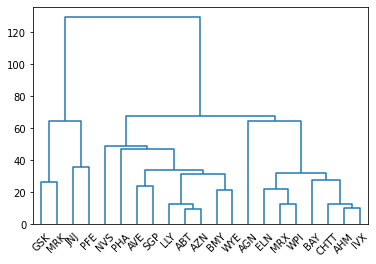

In [ ]:
# 2. Run the average linkage algorithm on your dataframe, generate a related dendrogram (color_threshold=3.9), and print your cluster membership (4 clusters).

Z = linkage(pharma_df[perfValues], method='average')
dendrogram(Z, labels=pharma_df[perfValues].index, color_threshold=3.9) 


In [ ]:
memb = fcluster(linkage(pharma_df[perfValues], method='average'), 4, criterion='maxclust')
memb = pd.Series(memb, index=pharma_df[perfValues].index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))


1 :  GSK, JNJ, MRK, PFE
2 :  ABT, AZN, AVE, BMY, LLY, NVS, PHA, SGP, WYE
3 :  AHM, BAY, CHTT, ELN, IVX, MRX, WPI
4 :  AGN


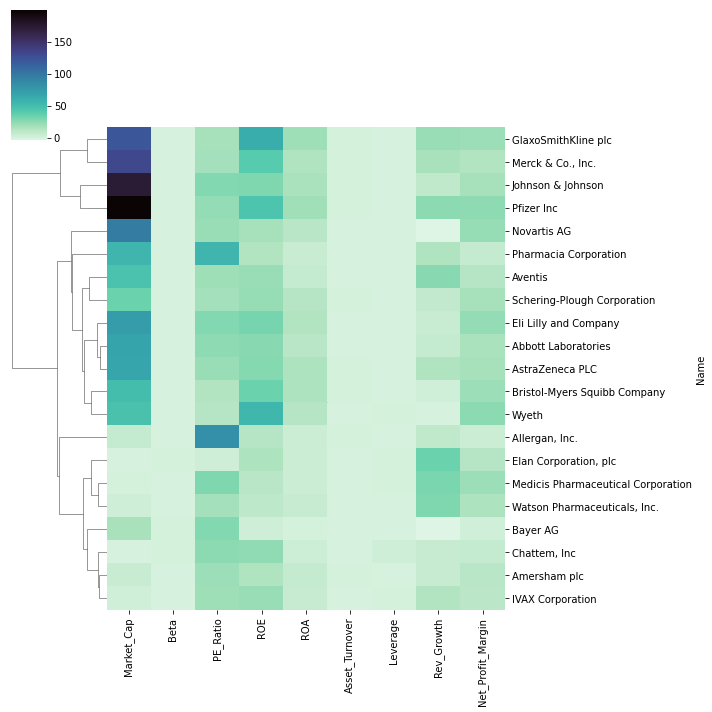

In [ ]:
# 3. Print a clustermap by setting labels as cluster membership and company name
# 
pharma_df[perfValues].index = ['{}: {}'.format(cluster, company) for cluster, company in zip(memb, pharma_df[perfValues].index)]
sns.clustermap(pharma_df[perfValues], method='average', col_cluster=False, cmap='mako_r') 

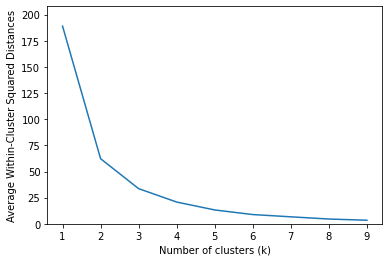

In [ ]:
# 4.
# Run k-means clustering algorithm (use the elbow chart to determine the best number of clusters) and determine and plot the centroids. 
# Also, print the cluster membership, the within-cluster sum of squared distances (including the cluster count), and Euclidian distance
# between cluster centroids.

# Load and preprocess data
pharma_df = pd.read_csv('Pharmaceuticals.csv')
pharma_df.set_index('Symbol', inplace=True)
perfValues = ['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']
pharma_df[perfValues] = pharma_df[perfValues].apply(lambda x: x.astype('float64'))

# Normalize distances
pharma_df_norm = pharma_df[perfValues].apply(preprocessing.scale, axis=0)

inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pharma_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show() 


In [ ]:
# Based on the elbow chart above, we'll stay at 4 clusters, since adding beyond brings less improvments to homogeneity
kmeans = KMeans(n_clusters=4, random_state=0).fit(pharma_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=pharma_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index)) 


0 :  ABT, BMY, LLY, NVS, SGP, WYE
1 :  AGN, AHM, BAY, PHA
2 :  AZN, GSK, JNJ, MRK, PFE
3 :  AVE, CHTT, ELN, IVX, MRX, WPI


In [ ]:
# centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pharma_df_norm.columns)
pd.set_option('precision', 3)
centroids


,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,0.078,-0.548,-0.342,0.372,0.488,-0.079,-0.178,-0.890,0.818
1,-0.628,0.277,1.347,-0.985,-1.043,0.236,-0.368,-0.590,-1.412
2,1.425,-0.151,-0.212,1.034,1.295,1.134,-0.537,0.413,0.557
3,-0.847,0.489,-0.379,-0.577,-0.872,-1.024,0.871,0.939,-0.340


In [ ]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(pharma_df_norm)
# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2
# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_},index=pharma_df_norm.index)
# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ') 


Cluster 0 (6 members): 14.70 within cluster 
Cluster 1 (4 members): 21.57 within cluster 
Cluster 2 (5 members): 13.20 within cluster 
Cluster 3 (6 members): 33.75 within cluster 


In [ ]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3
0,0.000,3.662,2.539,3.371
1,3.662,0.000,4.700,3.143
2,2.539,4.700,0.000,4.540
3,3.371,3.143,4.540,0.000


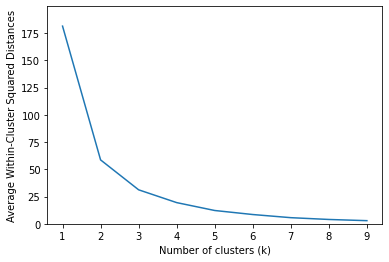

In [ ]:
# 5.
# To check the clusters' stability, remove a random 5% of the data (by taking a random sample of 95% of the records), and repeat the analysis.
# Does the same picture emerge? Briefly discuss the results from your clustering analysis. What can you conclude?

# Load and preprocess data
pharma_df = pd.read_csv('Pharmaceuticals.csv')
pharma_df.set_index('Symbol', inplace=True)
perfValues = ['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']
pharma_df[perfValues] = pharma_df[perfValues].apply(lambda x: x.astype('float64'))

# Normalize distances
pharma_df_norm = pharma_df[perfValues].apply(preprocessing.scale, axis=0)

# Remove 5%
remove_n = int(.05 * len(pharma_df_norm))
drop_indices = np.random.choice(pharma_df_norm.index, remove_n, replace=False)
pharma_df_norm = pharma_df_norm.drop(drop_indices)

inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pharma_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show() 

In [ ]:
# The elbow chart looks very similar. We stay with 4 clusters.
kmeans = KMeans(n_clusters=4, random_state=0).fit(pharma_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=pharma_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index)) 

0 :  CHTT, ELN, IVX, MRX
1 :  ABT, AHM, AZN, AVE, BMY, LLY, SGP, WPI, WYE
2 :  AGN, BAY, PHA
3 :  GSK, JNJ, MRK, PFE


In [ ]:
# centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pharma_df_norm.columns)
pd.set_option('precision', 3)
centroids

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,-0.986,1.224,-0.373,-0.533,-0.985,-1.182e+00,1.514,0.730,-0.378
1,-0.230,-0.466,-0.349,0.089,0.213,1.050e-01,-0.265,-0.174,0.332
2,-0.538,0.456,1.896,-1.066,-1.216,-3.331e-16,-0.353,-0.591,-1.649
3,1.737,-0.182,-0.203,1.265,1.384,1.182e+00,-0.480,0.479,0.606


In [ ]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(pharma_df_norm)
# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2
# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_},index=pharma_df_norm.index)
# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ') 


Cluster 0 (4 members): 20.18 within cluster 
Cluster 1 (9 members): 32.13 within cluster 
Cluster 2 (3 members): 15.69 within cluster 
Cluster 3 (4 members): 9.75 within cluster 


In [ ]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3
0,0.000,3.376,3.810,5.372
1,3.376,0.000,3.671,2.904
2,3.810,3.671,0.000,5.461
3,5.372,2.904,5.461,0.000


# Conclusion

Remove 1 value (5% of the dataset represented a single record) was not enough to make us change the number of clusters userd. I did seem to impact the member distribution across clusters but the distances between cluster stayed very similar.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52e9ae2e-8d42-48c9-9988-588f5a262306' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>